## CMSC 35300 Final Project: Models
Shweta Kamath <br>
Nivedita Vatsa <br>
Carolyn Vilter

#### Setup

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [264]:
# Import data
df = pd.read_csv("data/all_data.csv")

In [265]:
df

,child_id,mother_id,treat_alike_scale,treat_alike_binary,year_at_y,gap_at_y,self_worth,yob_child,father_present,religion_freq,...,highest_expected_grade_GRADUATE FROM COLLEGE,highest_expected_grade_GET MORE THAN 4 YEARS OF COLLEGE,highest_expected_grade_SOMETHING ELSE,mother_race_BLACK,"mother_race_NON-BLACK, NON-HISPANIC",mother_relig_raised_protestant,mother_relig_raised_catholic,mother_relig_raised_other,mother_relig_current_protestant,mother_relig_current_catholic
0,301,3,2,1,1994,13,160,1981,1.000000,2.0,...,1,0,0,0,1,0,1,0,0,1
1,302,3,1,1,1996,13,240,1983,1.000000,3.5,...,0,0,0,0,1,0,1,0,0,1
2,303,3,1,1,2000,14,220,1986,1.000000,5.0,...,0,0,0,0,1,0,1,0,0,0
3,803,8,1,1,1996,14,170,1982,0.363636,2.0,...,1,0,0,0,1,0,0,1,1,0
4,1601,16,1,1,2004,14,180,1990,1.000000,4.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,1255801,12558,2,1,2002,13,240,1989,0.000000,6.0,...,1,0,0,1,0,0,0,1,0,0
5157,1256602,12566,2,1,1998,13,220,1985,1.000000,6.0,...,1,0,0,1,0,1,0,0,1,0
5158,1256603,12566,1,1,2002,14,220,1988,0.888889,6.0,...,0,1,0,1,0,1,0,0,1,0
5159,1256604,12566,1,1,2004,12,230,1992,0.714286,6.0,...,0,1,0,1,0,1,0,0,1,0


In [266]:
# Separate out Xs
X = df.loc[:, ~df.columns.isin(["child_id", "mother_id", "treat_alike_scale", "treat_alike_binary"])]
X = X.to_numpy()

# Separate out two prospective ys
y_scale = df.loc[:, df.columns == "treat_alike_scale"]
y_scale = y_scale.to_numpy()

y_binary = df.loc[:, df.columns == "treat_alike_binary"]
y_binary = y_binary.to_numpy()

### Least Squares
Predict repeatedly using cross validation; plot test error.

In [267]:
# Number of random trials
N = 100
# Store error values
errs = np.zeros(N)
# Number of observations/samples
n = X.shape[0]
# Chosen number of sets to divide dataset into
n_sets = 10
# Final index of the training set (9 of 10 subsets)
t_index = n//n_sets*(n_sets-1)

for i in range(N):

    # (Re)assign training and hold-out indices
    r = np.random.permutation(n)
    it = r[:t_index]
    ih = r[t_index:]

    # Training data
    Xt = X[it, :]

    # Find w-hat using using training y_scale
    yt = y_scale[it]
    wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt

    # Apply w-hat to holdout data
    Xh = X[ih, :]
    yh = y_scale[ih]
    yhat = Xh@wt

    # Assign y-hat results to closest label: 1, 2, 3, or 4
    for idx, pred in enumerate(yhat):
        dists = []
        for label in range(1, 5):
            dists.append(abs(pred - label))
        match = dists.index(min(dists))
        yhat[idx] = match + 1

    errs[i] = np.mean(yhat != yh)

In [268]:
np.unique(yhat)

array([1., 2., 3.])

Average error rate over all iterations: 0.5511218568665377


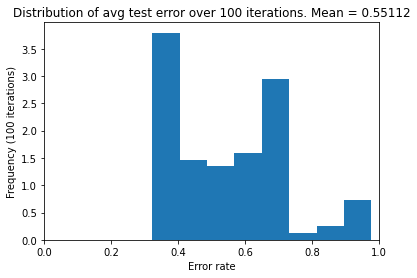

In [269]:
avg_error = np.mean(errs)
print("Average error rate over all iterations:", avg_error)

# Plot histogram of error rates
plt.hist(errs, density=True, bins=8)
plt.xlim(0, 1)
plt.xlabel('Error rate')
plt.ylabel('Frequency ({:.0f} iterations)'.format(N))
plt.title('Distribution of avg test error over {:.0f} iterations. Mean = {:.5f}'.format(N, avg_error))
plt.show()